In [2]:
import pandas as pd
from config import RXNAV_PATH, MEDDRA_CSV_PATH, MIMIC_NOTES_PICKLE_OUTPUT_PATH
from a4_rxnorm import RxNav
from Levenshtein import ratio
from util import load_pickle

rxnav : RxNav = load_pickle(RXNAV_PATH)

def search(term, drug_targets, rxcui_str_to_id, rxcui_resolver_dict):
    best_match = max([(target, ratio(term, target))
                     for target in drug_targets], key=lambda x: x[1])[0]
    print(f"Best match is {best_match}")
    rxcui_id = rxcui_str_to_id[best_match]
    if rxcui_id in rxcui_resolver_dict:
        possible_matches = rxcui_resolver_dict[rxcui_id]
        print(possible_matches)
        return possible_matches
    return []


In [3]:
mimic_df = pd.read_pickle(MIMIC_NOTES_PICKLE_OUTPUT_PATH)

In [6]:
all_texts = mimic_df['TEXT'].values
all_lens = [len(text) for text in all_texts]

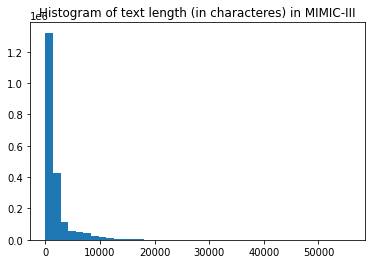

In [8]:
import matplotlib.pyplot as plt
plt.title("Histogram of text length (in characteres) in MIMIC-III")
plt.hist(all_lens,bins=40)
plt.show()

In [9]:
import numpy as np
np.mean(all_lens)


1826.0114800449312

In [10]:
np.std(all_lens)

2510.938202052084

In [1]:
from a2_spanbert import load_ner
ner = load_ner(use_gpu=True)
ner("ancef is used in various medications.")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'B-DRUG',
  'score': 0.9680352,
  'index': 1,
  'word': 'an',
  'start': 0,
  'end': 2},
 {'entity': 'I-DRUG',
  'score': 0.97342354,
  'index': 2,
  'word': '##ce',
  'start': 2,
  'end': 4},
 {'entity': 'I-DRUG',
  'score': 0.97351915,
  'index': 3,
  'word': '##f',
  'start': 4,
  'end': 5}]